# Import Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import joblib

In [ ]:
# Load the dataset
df = pd.read_csv('Life-Expectancy-Data-Updated.csv')

In [ ]:
# Filter only the relevant columns
filtered_df = df[['BMI', 'GDP_per_capita', 'Schooling', 'Life_expectancy']]

# Save the filtered data to a new CSV file
filtered_df.to_csv('life_exp.csv', index=False)

In [4]:
df = pd.read_csv('life_exp.csv')

In [5]:
df

,BMI,GDP_per_capita,Schooling,Life_expectancy
0,27.8,11006,7.8,76.5
1,26.0,25742,9.7,82.8
2,21.2,1076,5.0,65.4
3,25.3,4146,7.9,67.0
4,27.0,33995,12.8,81.7
...,...,...,...,...
2859,20.8,399,1.1,49.9
2860,25.3,2515,9.1,66.9
2861,21.9,2130,10.3,74.3
2862,26.1,7424,11.1,71.8


In [7]:
df['BMI'].min()

np.float64(19.8)

In [9]:
df['BMI'].max()

np.float64(32.1)

In [10]:
df.isnull().sum()

BMI                0
GDP_per_capita     0
Schooling          0
Life_expectancy    0
dtype: int64

In [11]:
# Check the dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   BMI              2864 non-null   float64
 1   GDP_per_capita   2864 non-null   int64  
 2   Schooling        2864 non-null   float64
 3   Life_expectancy  2864 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 89.6 KB


In [12]:
# Statistical summary of the dataframe
df.describe()

,BMI,GDP_per_capita,Schooling,Life_expectancy
count,2864.000000,2864.000000,2864.000000,2864.000000
mean,25.032926,11540.924930,7.632123,68.856075
std,2.193905,16934.788931,3.171556,9.405608
min,19.800000,148.000000,1.100000,39.400000
25%,23.200000,1415.750000,5.100000,62.700000
50%,25.500000,4217.000000,7.800000,71.400000
75%,26.400000,12557.000000,10.300000,75.400000
max,32.100000,112418.000000,14.100000,83.800000


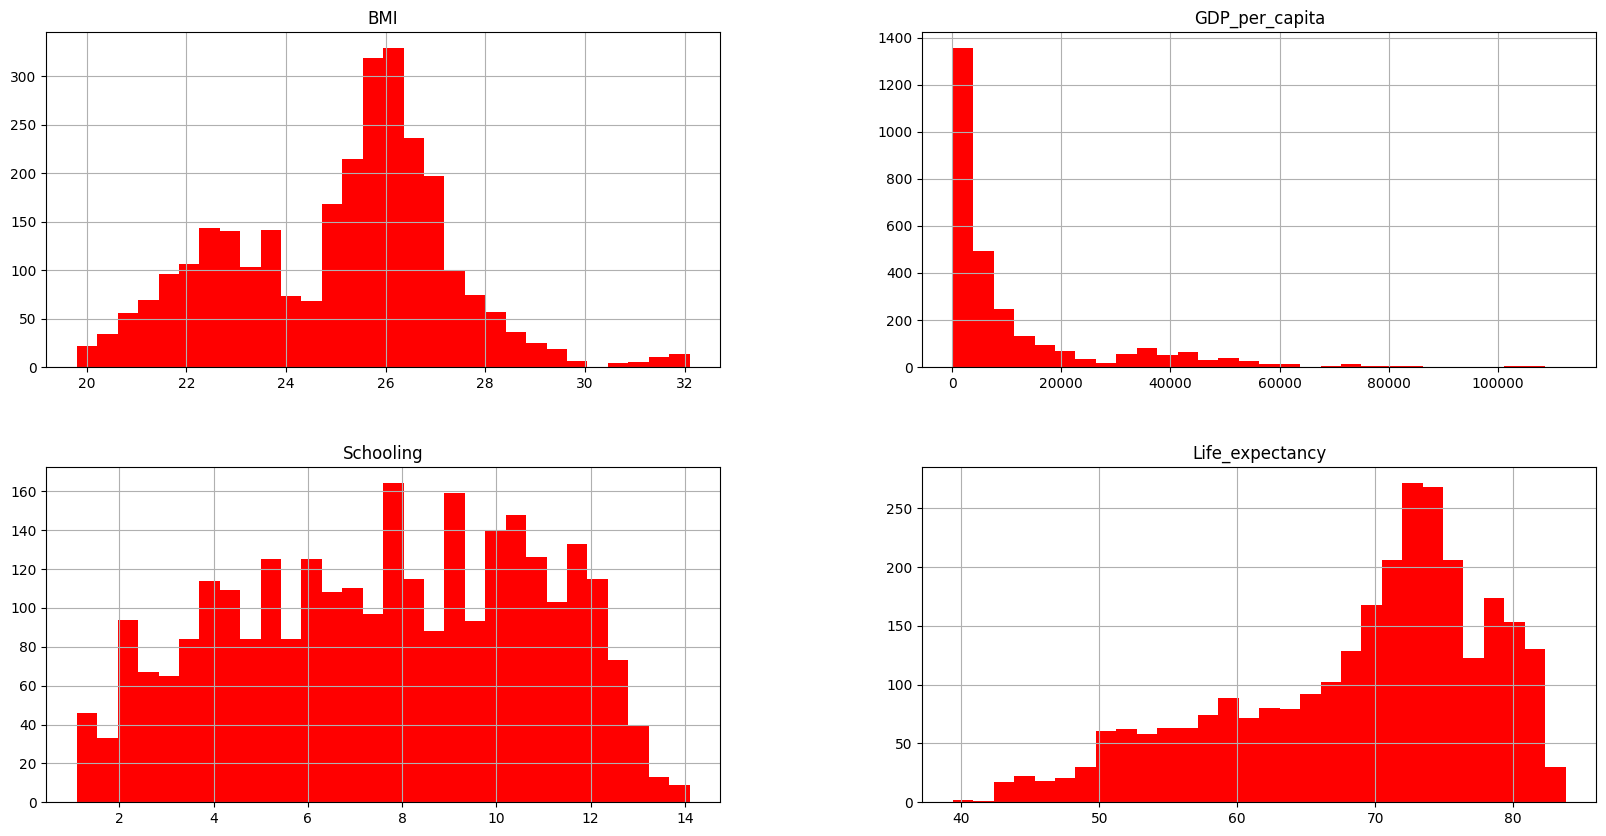

In [14]:
# Histogram Plotting (Data Distribution)
df.hist(bins=30, figsize=(20, 10), color='r')

# Show the plot
plt.show()

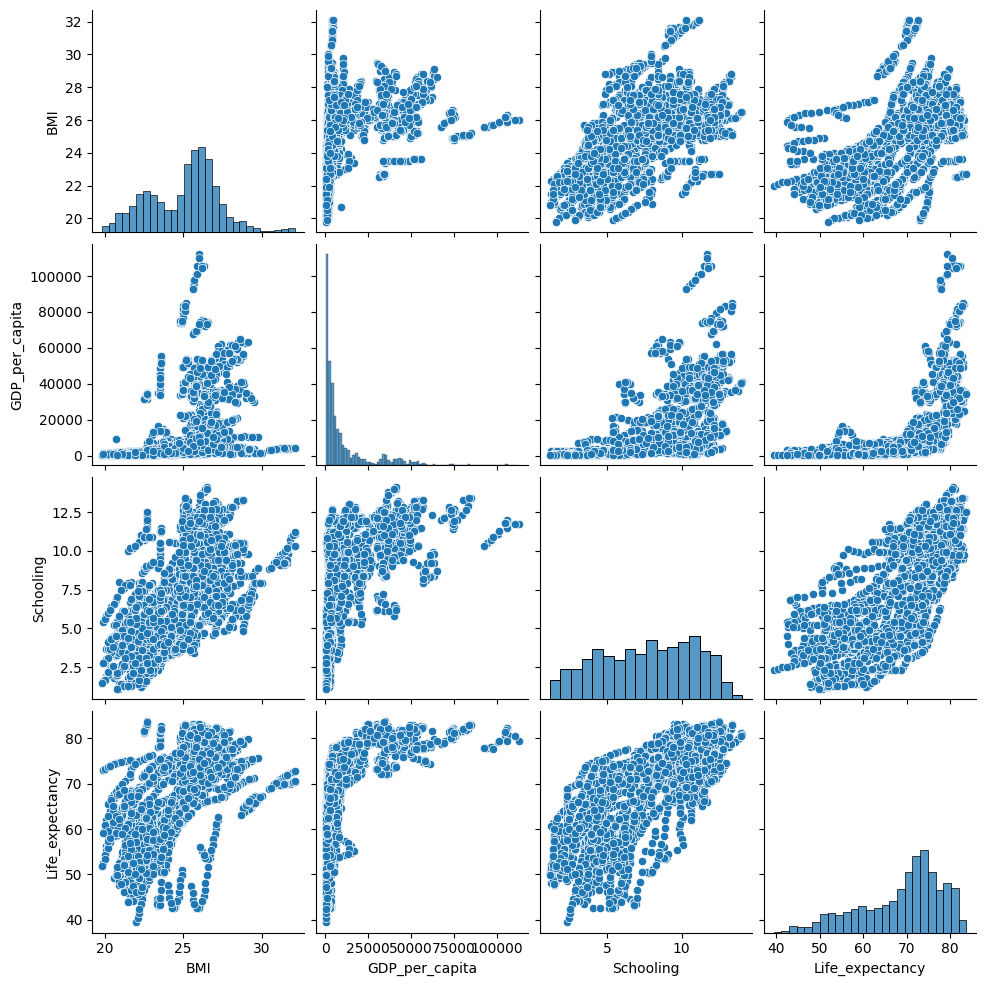

In [15]:
# Plot Pairplot (Variables Relationship)
sns.pairplot(df)

                      BMI  GDP_per_capita  Schooling  Life_expectancy
BMI              1.000000        0.336180   0.635475         0.598423
GDP_per_capita   0.336180        1.000000   0.580626         0.583090
Schooling        0.635475        0.580626   1.000000         0.732484
Life_expectancy  0.598423        0.583090   0.732484         1.000000


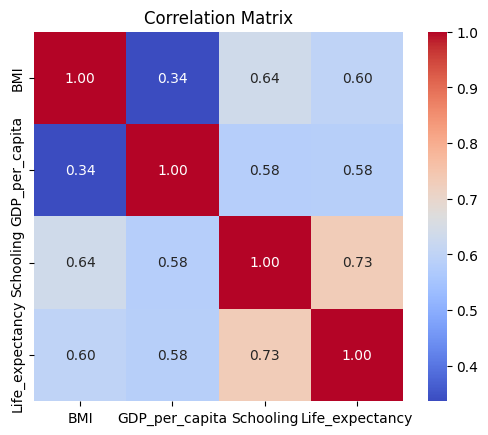

In [22]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Print the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Matrix')
plt.show()

In [16]:
# Select relevant features
features = ['BMI', 'GDP_per_capita', 'Schooling']
X = df[features]  # Features (independent variables)
y = df['Life_expectancy']  # Target (dependent variable)

In [17]:
# Split the data into training and testing sets (80% train, 20% test)
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Create the linear regression model
model = LinearRegression()

# Train the model
model.fit(train_x, train_y)

LinearRegression()

In [19]:
# Optional: Evaluate model performance on the test set
score = model.score(test_x, test_y)
print(f"Model R^2 score: {score:.2f}")

Model R^2 score: 0.58


In [25]:
# Checking the accuracy
y_pred = model.predict(test_x)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(test_y, y_pred)

# Display the MSE
mse

np.float64(35.24431601282236)

In [26]:
y_pred

array([78.5403811 , 81.97445661, 61.61062164, 57.74033179, 74.65724558,
       80.78063979, 72.99483324, 60.74248492, 76.25993935, 88.11227059,
       58.84637476, 66.61181116, 86.15834856, 69.84660037, 72.52065088,
       62.47811189, 69.07592822, 77.21767806, 69.53165484, 72.06903233,
       76.2342679 , 55.93605626, 74.84175328, 78.19499247, 71.51145426,
       74.20141915, 73.93503642, 70.09181755, 57.44953503, 58.36653274,
       59.07559024, 71.69113411, 75.95346919, 59.79468147, 61.15038422,
       69.12517437, 60.79714883, 73.92211407, 59.52440025, 61.14791141,
       69.55140304, 64.39074851, 60.88940873, 58.1276825 , 68.42455411,
       61.08108182, 62.47678434, 55.72451407, 73.91391641, 73.52925666,
       69.48177651, 76.27527808, 69.95985857, 75.22345239, 77.90314078,
       63.2947415 , 67.31886094, 75.95114917, 69.15544086, 59.33899293,
       69.3782811 , 59.34392313, 63.88909644, 83.15639702, 70.83402899,
       79.89886471, 77.28344913, 73.62943412, 71.43791569, 78.87

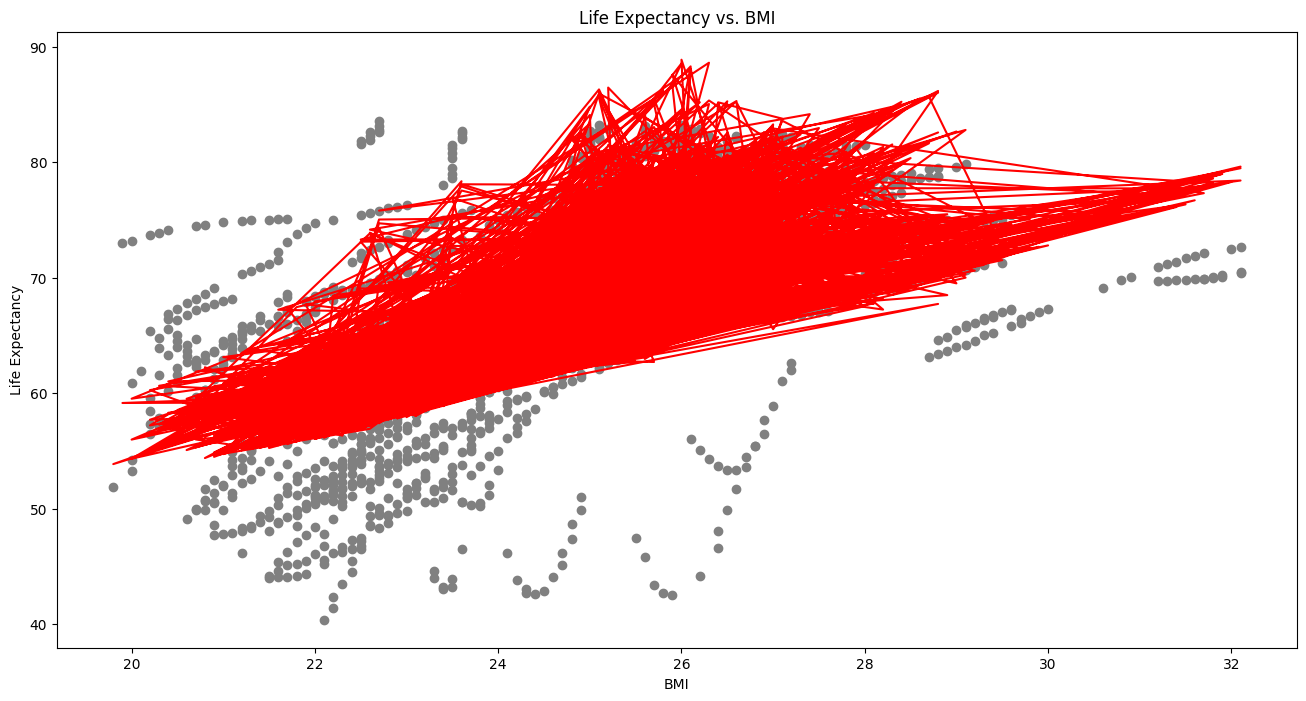

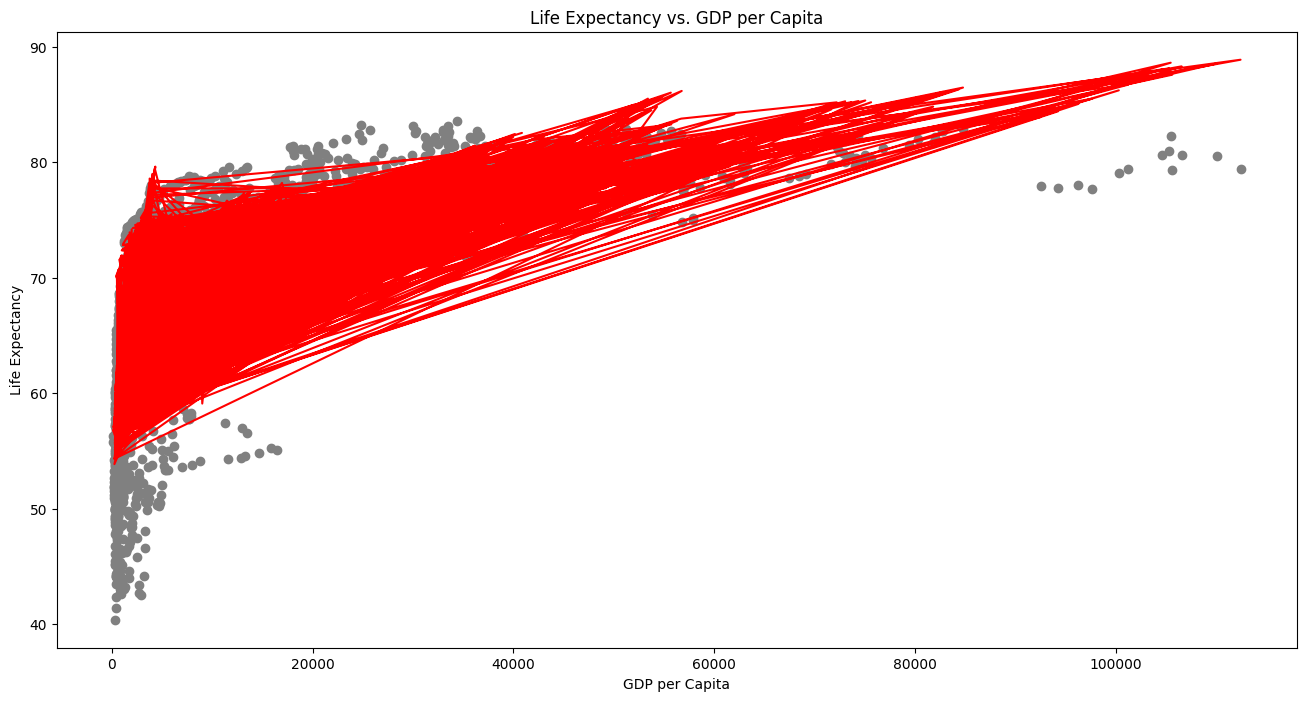

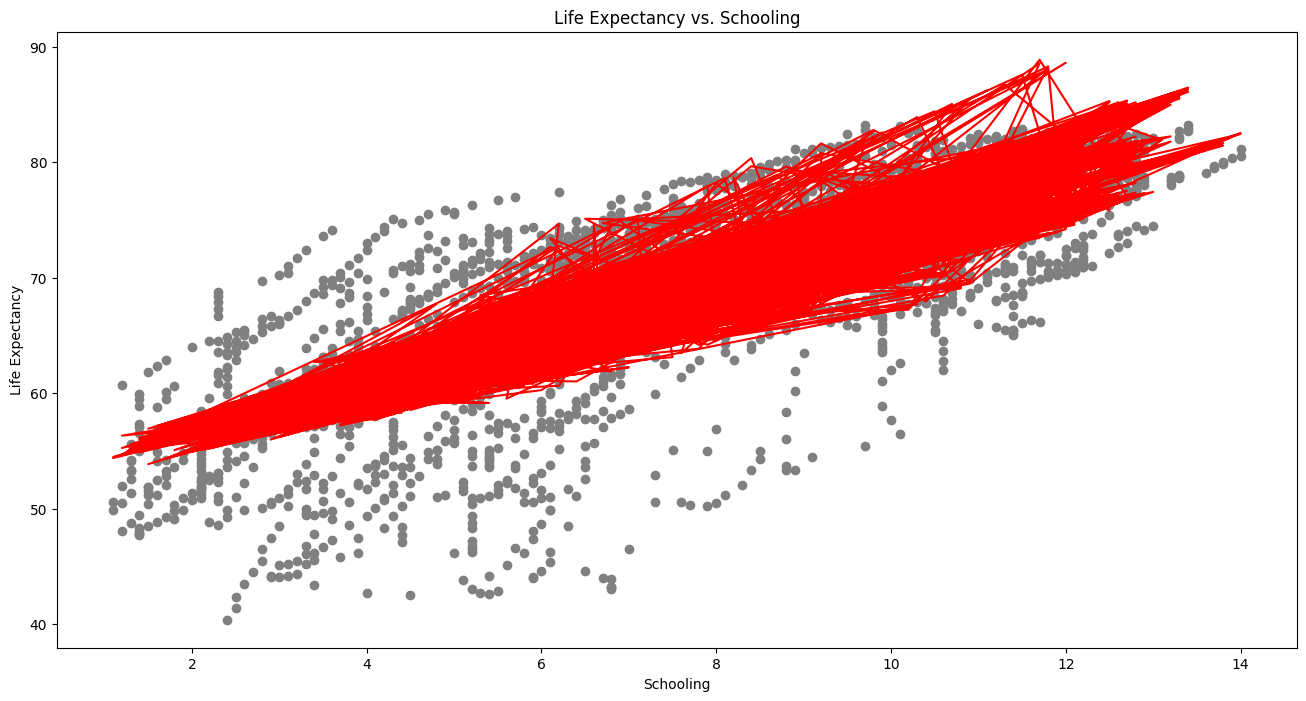

In [21]:
# For BMI vs Life Expectancy
plt.figure(figsize=(16, 8))
plt.scatter(train_x['BMI'], train_y, color='gray')
plt.plot(train_x['BMI'], model.predict(train_x), color='red')
plt.ylabel('Life Expectancy')
plt.xlabel('BMI')
plt.title('Life Expectancy vs. BMI')
plt.show()

# For GDP_per_capita vs Life Expectancy
plt.figure(figsize=(16, 8))
plt.scatter(train_x['GDP_per_capita'], train_y, color='gray')
plt.plot(train_x['GDP_per_capita'], model.predict(train_x), color='red')
plt.ylabel('Life Expectancy')
plt.xlabel('GDP per Capita')
plt.title('Life Expectancy vs. GDP per Capita')
plt.show()

# For Schooling vs Life Expectancy
plt.figure(figsize=(16, 8))
plt.scatter(train_x['Schooling'], train_y, color='gray')
plt.plot(train_x['Schooling'], model.predict(train_x), color='red')
plt.ylabel('Life Expectancy')
plt.xlabel('Schooling')
plt.title('Life Expectancy vs. Schooling')
plt.show()

In [ ]:
joblib.dump(model, 'life_xp.pkl')  # Save model to file

In [ ]:
# Load the dataset
df = pd.read_csv('life_exp.csv')

# Select relevant features
features = ['BMI', 'GDP_per_capita', 'Schooling']
X = df[features]  # Features (independent variables)
y = df['Life_expectancy']  # Target (dependent variable)

# Split the data into training and testing sets (80% train, 20% test)
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the linear regression model
model = LinearRegression()

# Train the model
model.fit(train_x, train_y)

# Save the trained model using joblib
# joblib.dump(model, 'life_xp.pkl')  # Save model to file
df['GDP_per_capita'].max()

# Optional: Evaluate model performance on the test set
score = model.score(test_x, test_y)
print(f"Model R^2 score: {score:.2f}")